In [1]:
import pandas as pd
import pydot as py


var_mapping = {
                'feed_air/comp_1.P_1' : 'P1',
                'comp_1/v_6.F_7' : 'F7',
                'comp_1/v_6.P_2' : 'P2',
                'react_1.T_reg' : 'T_reg',
                'react_1.L_sp' : 'L_sp',
                'react_1.P_6' : 'P6',
                'react_1/v_7.F_sg' : 'F_sg',
                'react_1/v_7.T_cyc' : 'T_cyc',
                'v_7/prod_stack.X_co' : 'C_cosg',
                'v_7/prod_stack.X_co2' : 'C_co2sg',
                'react_1/v_2.F_rgc' : 'F_rgc',
                'react_2.T_r' : 'T_r',
                'react_2.P_4' : 'P4',
                'react_2/v_3.F_sc' : 'F_sc',
                'feed_feedstream/furn_1.F_3' : 'F3',
                'feed_feedstream/furn_1.T_1' : 'T1',
                'feed_fuel/v_1.F_5' : 'F5',
                'furn_1.T_3' : 'T3',
                'furn_1/react_2.T_2' : 'T2',
                'distil_1.T_20' : 'T_20',
                'distil_1.T_10' : 'T_10',
                'distil_1.T_fra' : 'T_fra',
                'distil_1.P_5' : 'P5',
                'v_11/prod_lightoil.F_lco' : 'F_LCO',
                'v_10/prod_heavynaptha.F_hn' : 'F_HN',
                'v_9/prod_lightnaptha.F_ln' : 'F_LN',
                'v_8/distil_1.F_reflux' : 'F_Reflux',
                'comp_2/prod_lpg.F_lpg' : 'F_LPG',
                'react2_1/prod_slurry.F_slurry' : 'F_Slurry',
                'ACAB' : 'ACAB',
                'AWGC' : 'AWGC',
                'Pos_1' : 'V1',
                'Pos_2' : 'V2',
                'Pos_3' : 'V3',
                'Pos_4' : 'V4',
                'Pos_6' : 'V6',
                'Pos_7' : 'V7',
                'Pos_8' : 'V8',
                'Pos_9' : 'V9',
                'Pos_10' : 'V10',
                'Pos_11' : 'V11',
                }


data_files = ['NOC_stableFeedFlow_outputs.csv',
              'NOC_varyingFeedFlow_outputs.csv',
              'CAB_valveLeak_outputs.csv',
              'condEff_decrease_outputs.csv',
              'deltaP_increase_outputs.csv',
              'Fhn_sensorDrift_outputs.csv',
              'UAf_decrease_outputs.csv']
file_ind = 1
data = pd.read_csv(rf'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Data\{data_files[file_ind]}')
# additional_vars = ['Time', 'T_atm', 'deltaP', 'Fair', 'T_cyc-T_reg', 'FV11']
# data = data.drop(columns = additional_vars)


from ground_truth import ground_truth
truth_graph_obj = ground_truth()
truth_graph_obj.ctrl(False, False)
truth_graph = {'nodes' : truth_graph_obj.nodes,
               'edges' : truth_graph_obj.edges}


from analyse_graphs import analyse_graphs

## Combustion air blower 



In [2]:
from test_cab_sections import test_cab_models

cab = test_cab_models(data, var_mapping)
cab.model_ctrl()

cab_kn_scores = cab.knowledge_scores
cab_scores = cab.comb_data_store

orig_cab_scores = cab_scores
cab_scores, cyclic_cab = analyse_graphs.remove_cycle_datapoints(cab_scores)

analyse_graphs.write_data_store(cab_scores, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\cab.xlsx')


c:\Users\fcb19bd\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


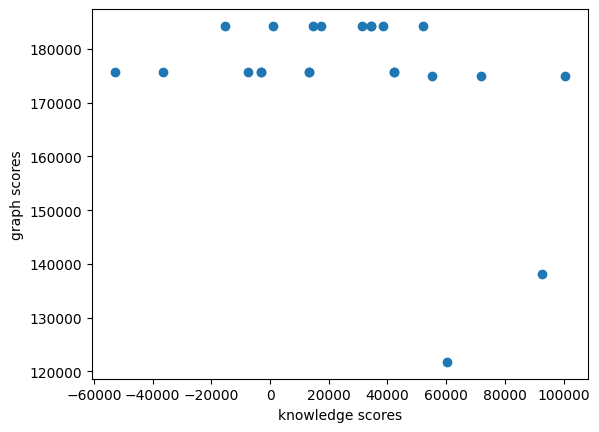

In [3]:

analyse_graphs.kn_score_vs_graph_score(cab_scores)

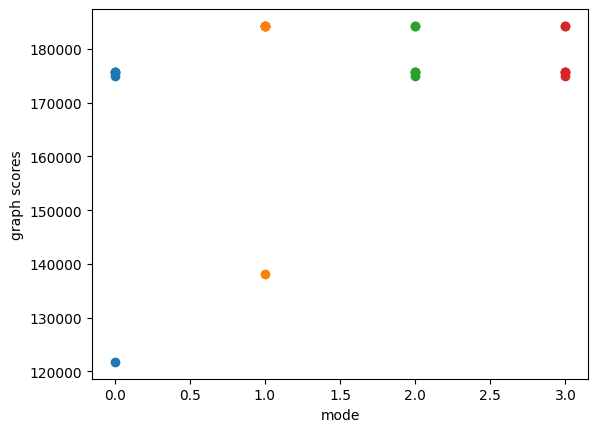

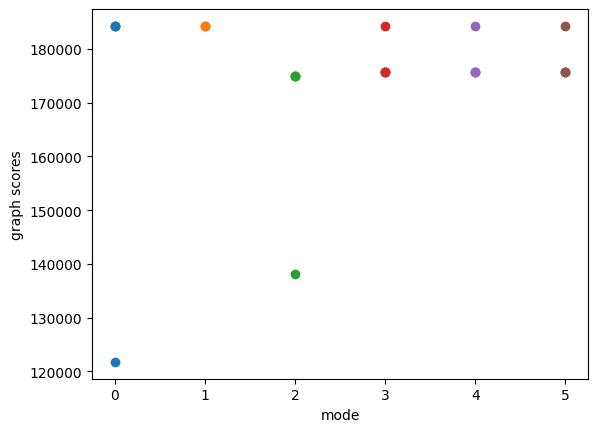

In [4]:

analyse_graphs.graph_score_for_mode(cab_scores, 0)
analyse_graphs.graph_score_for_mode(cab_scores, 1)

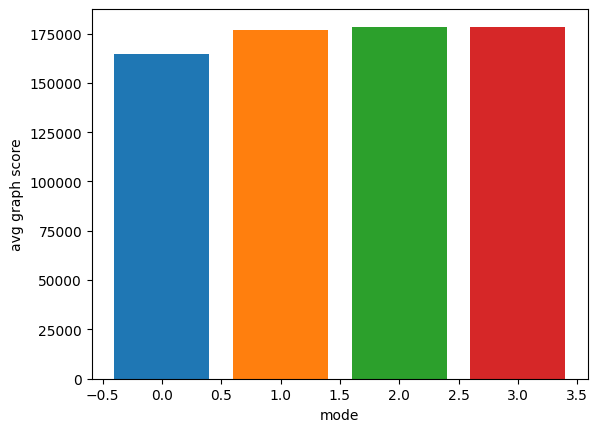

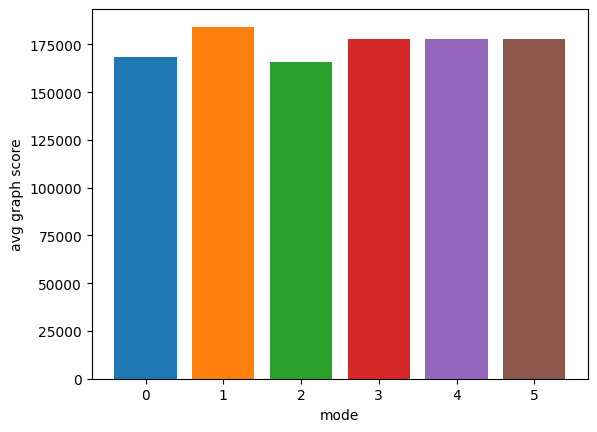

In [5]:
analyse_graphs.avg_graph_score_vs_mode_bar(cab_scores, 0)
analyse_graphs.avg_graph_score_vs_mode_bar(cab_scores, 1)


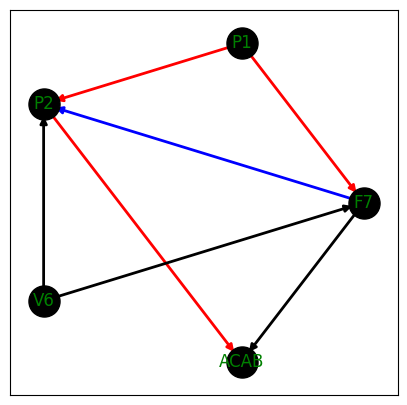

184288.1128697358


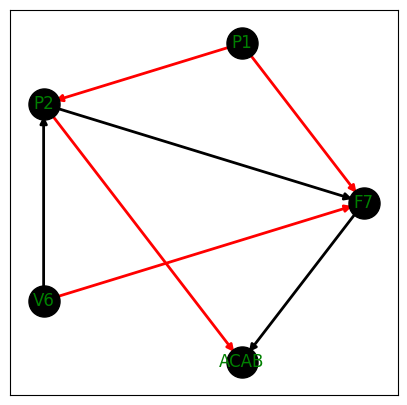

184269.19576454847


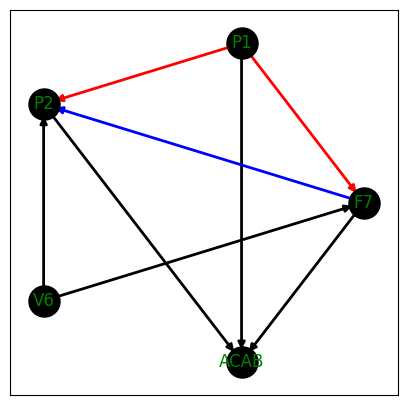

184251.88332941063


In [6]:
top_three_cab = analyse_graphs.find_top_three_graphs(cab_scores)
for itr in top_three_cab:

    analyse_graphs.visualise_graph(itr[0])
    print(itr[0]['graph score'])

analyse_graphs.write_top_three(top_three_cab, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\cab_top_three_score.xlsx')


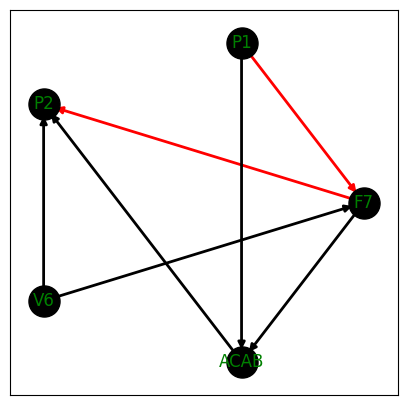

overall metric: 54.76190476190476
pc match: 83.33333333333333
pc mismatch: 28.571428571428573


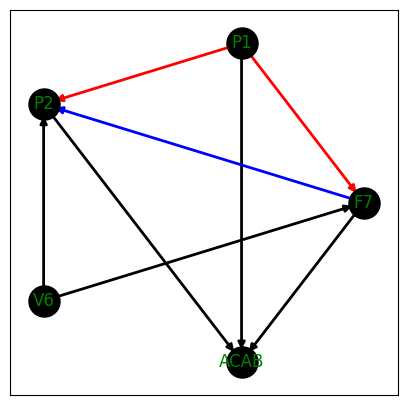

overall metric: 45.83333333333333
pc match: 83.33333333333333
pc mismatch: 37.5


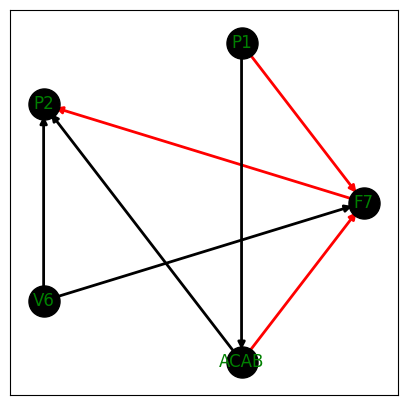

overall metric: 23.809523809523817
pc match: 66.66666666666667
pc mismatch: 42.857142857142854


In [7]:
cab_gt_similarity_scores = {}
top_three_closest_cab, cab_gt_similarity_scores['overall metric'], cab_gt_similarity_scores['pc match'], cab_gt_similarity_scores['pc_mismatch'] = analyse_graphs.find_top_three_closest_to_gt(cab_scores, truth_graph)
for itr in top_three_closest_cab:

    analyse_graphs.visualise_graph(cab_scores[itr[0]])
    print(f'overall metric: {cab_gt_similarity_scores['overall metric'][itr[0]]}')
    print(f'pc match: {cab_gt_similarity_scores['pc match'][itr[0]]}')
    print(f'pc mismatch: {cab_gt_similarity_scores['pc_mismatch'][itr[0]]}')


closest_data = []
for itr_place in top_three_closest_cab:

    closest_data.append([cab_scores[itr_graph] for itr_graph in itr_place])
analyse_graphs.write_top_three(closest_data, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\cab_top_three_closest.xlsx')


In [8]:
pc_unique  = analyse_graphs.find_pc_unique_graphs(cab_scores)
print(pc_unique)
print(pc_unique*len(cab_scores)/100)

34.78260869565217
8.0


## Regenerator

In [9]:
from test_react1_sections import test_react1_models

react1 = test_react1_models(data, var_mapping)
react1.model_ctrl()

react1_kn_scores = react1.knowledge_scores
react1_scores = react1.comb_data_store

orig_react1_scores = react1_scores
react1_scores, cyclic_react1 = analyse_graphs.remove_cycle_datapoints(react1_scores)

analyse_graphs.write_data_store(react1_scores, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\regenerator.xlsx')



[]


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

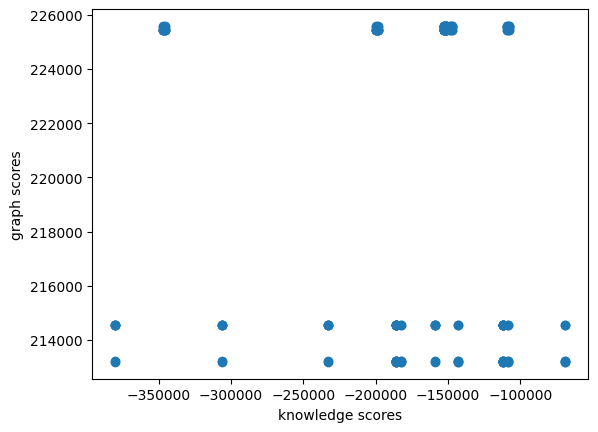

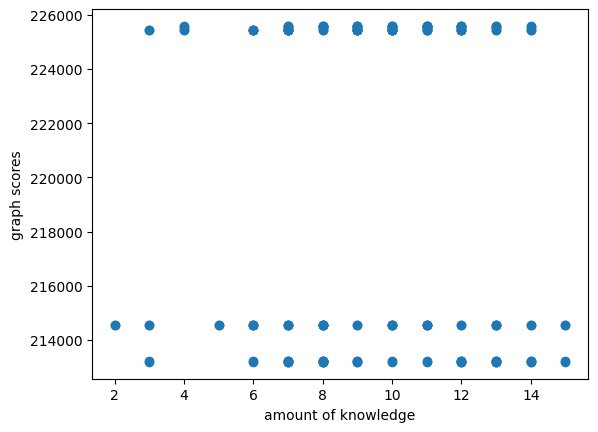

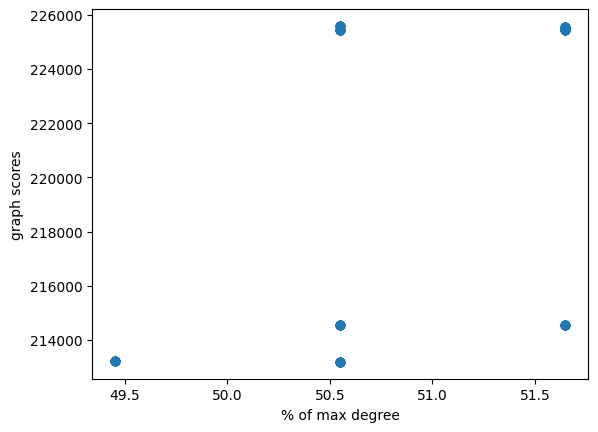

In [10]:
analyse_graphs.kn_score_vs_graph_score(react1_scores)
analyse_graphs.amount_kn_vs_graph_score(react1_scores)
analyse_graphs.pc_max_degree_vs_graph_score(react1_scores)

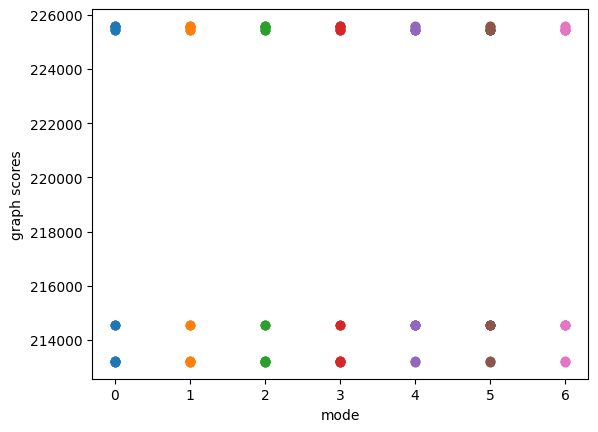

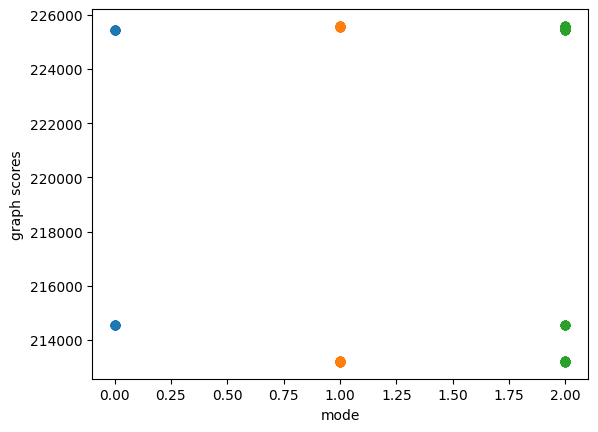

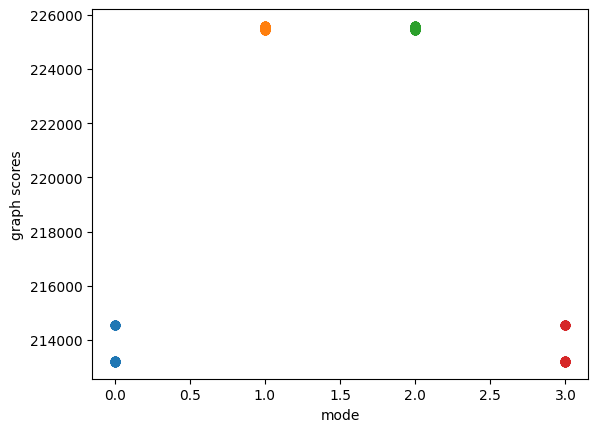

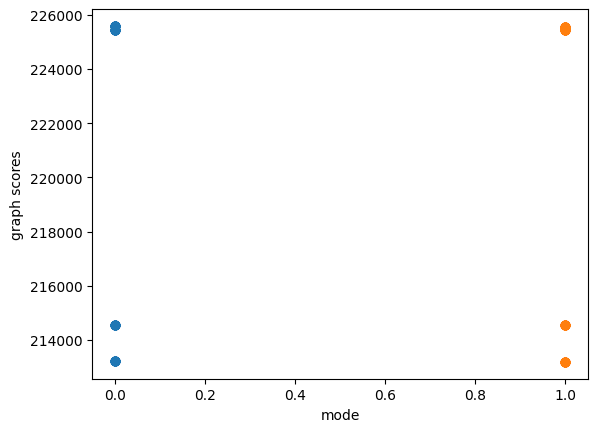

In [11]:
analyse_graphs.graph_score_for_mode(react1_scores, 0)
analyse_graphs.graph_score_for_mode(react1_scores, 1)
analyse_graphs.graph_score_for_mode(react1_scores, 2)
analyse_graphs.graph_score_for_mode(react1_scores, 3)

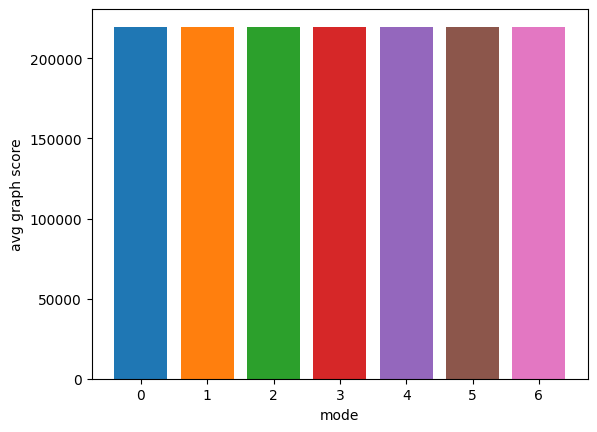

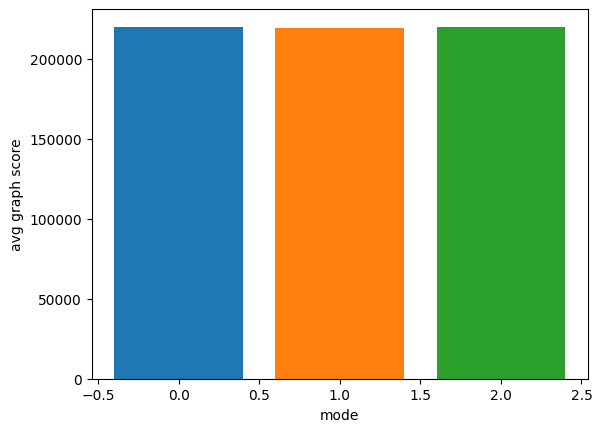

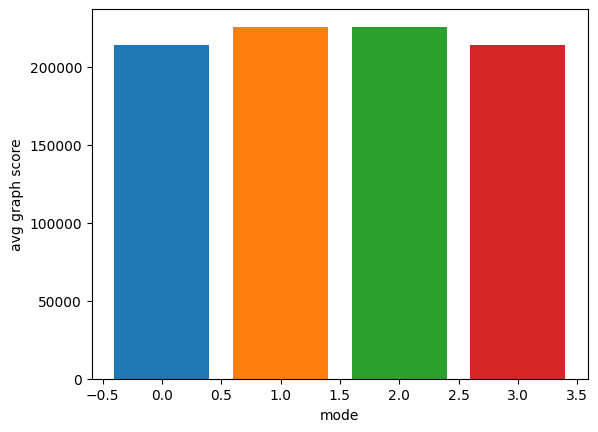

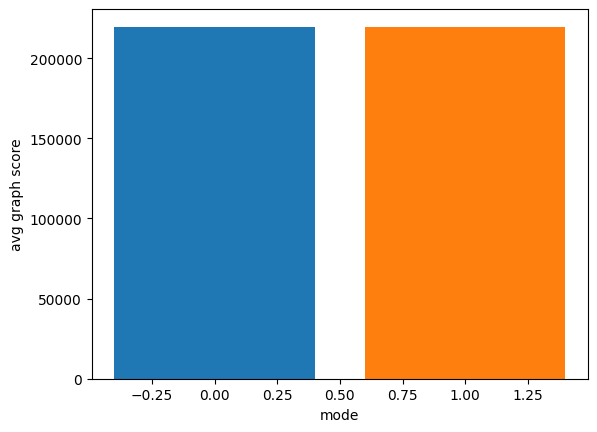

In [12]:
analyse_graphs.avg_graph_score_vs_mode_bar(react1_scores, 0)
analyse_graphs.avg_graph_score_vs_mode_bar(react1_scores, 1)
analyse_graphs.avg_graph_score_vs_mode_bar(react1_scores, 2)
analyse_graphs.avg_graph_score_vs_mode_bar(react1_scores, 3)

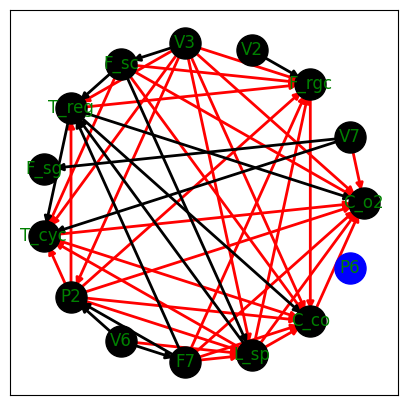

225593.89257935394


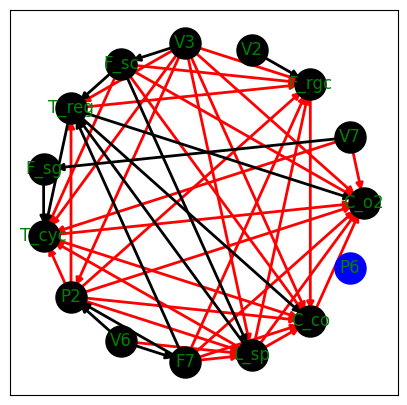

225572.24974490705


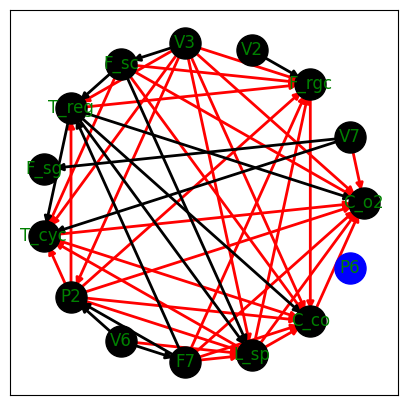

225449.60382971383


In [13]:
top_three_react1 = analyse_graphs.find_top_three_graphs(react1_scores)
for itr in top_three_react1:

    analyse_graphs.visualise_graph(itr[0])
    print(itr[0]['graph score'])

analyse_graphs.write_top_three(top_three_react1, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\regenerator_top_three_score.xlsx')

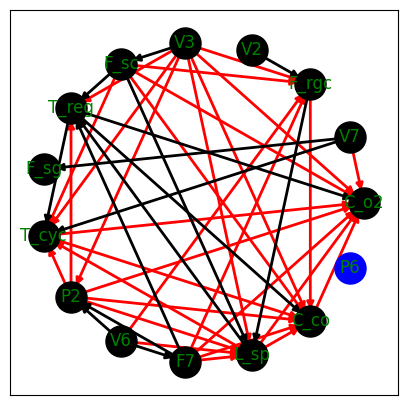

overall metric: 28.888888888888886
pc match: 100.0
pc mismatch: 71.11111111111111


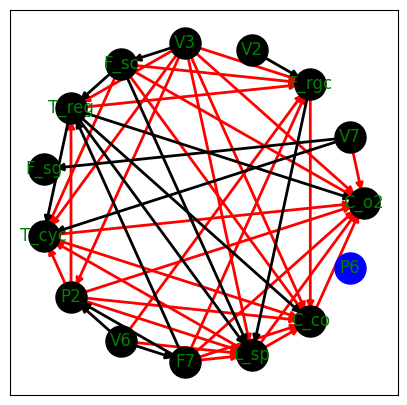

overall metric: 28.26086956521739
pc match: 100.0
pc mismatch: 71.73913043478261


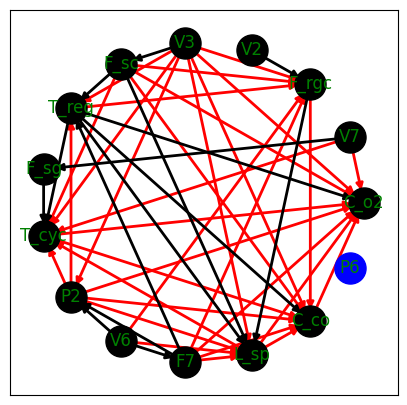

overall metric: 27.65957446808511
pc match: 100.0
pc mismatch: 72.34042553191489


In [14]:
react1_gt_similarity_scores = {}
top_three_closest_react1, react1_gt_similarity_scores['overall metric'], react1_gt_similarity_scores['pc match'], react1_gt_similarity_scores['pc_mismatch'] = analyse_graphs.find_top_three_closest_to_gt(react1_scores, truth_graph)
for itr in top_three_closest_react1:

    analyse_graphs.visualise_graph(react1_scores[itr[0]])
    print(f'overall metric: {react1_gt_similarity_scores['overall metric'][itr[0]]}')
    print(f'pc match: {react1_gt_similarity_scores['pc match'][itr[0]]}')
    print(f'pc mismatch: {react1_gt_similarity_scores['pc_mismatch'][itr[0]]}')


closest_data = []
for itr_place in top_three_closest_react1:

    closest_data.append([react1_scores[itr_graph] for itr_graph in itr_place])
analyse_graphs.write_top_three(closest_data, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\regenerator_top_three_closest.xlsx')

In [15]:
pc_unique  = analyse_graphs.find_pc_unique_graphs(react1_scores)
print(pc_unique)

4.761904761904762


## Fractionator

In [16]:
from test_distil_sections import test_distil_models

distil = test_distil_models(data, var_mapping)
distil.model_ctrl()

distil_kn_scores = distil.knowledge_scores
distil_scores = distil.comb_data_store

orig_distil_scores = distil_scores
distil_scores, cyclic_distil = analyse_graphs.remove_cycle_datapoints(distil_scores)

analyse_graphs.write_data_store(distil_scores, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\fractionator.xlsx')



[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


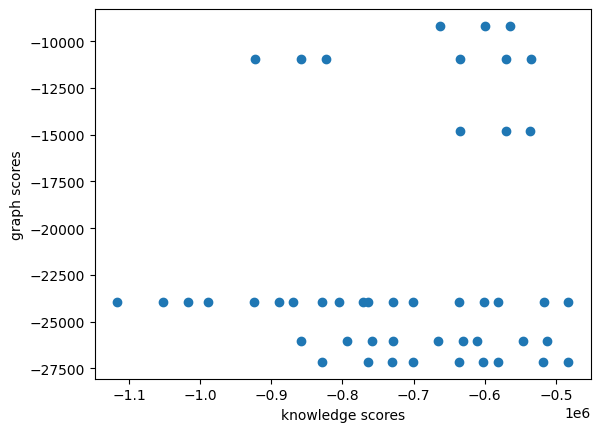

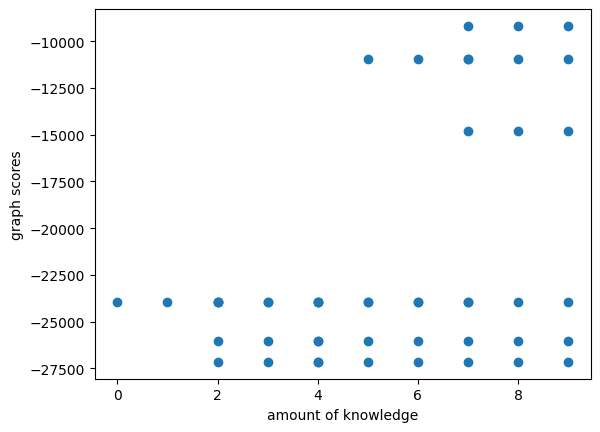

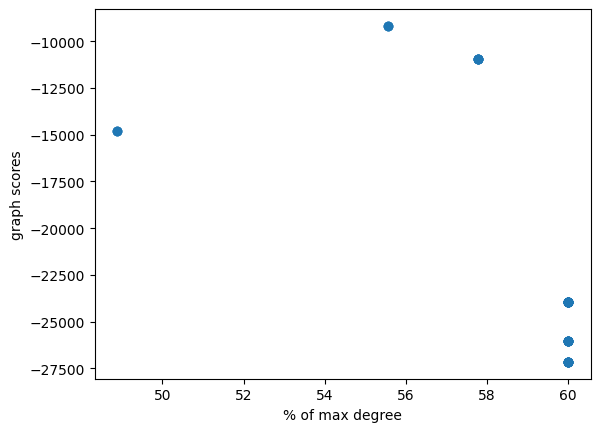

In [17]:
analyse_graphs.kn_score_vs_graph_score(distil_scores)
analyse_graphs.amount_kn_vs_graph_score(distil_scores)
analyse_graphs.pc_max_degree_vs_graph_score(distil_scores)

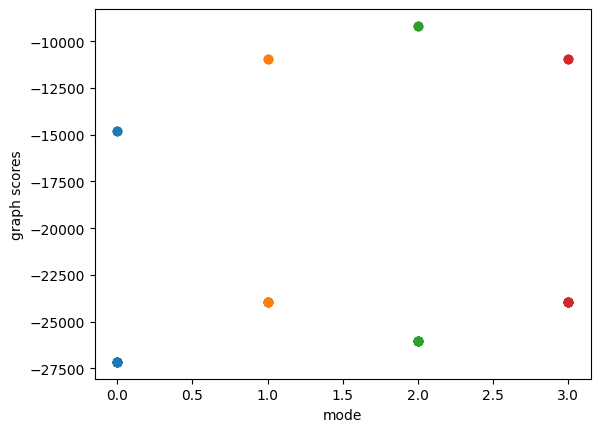

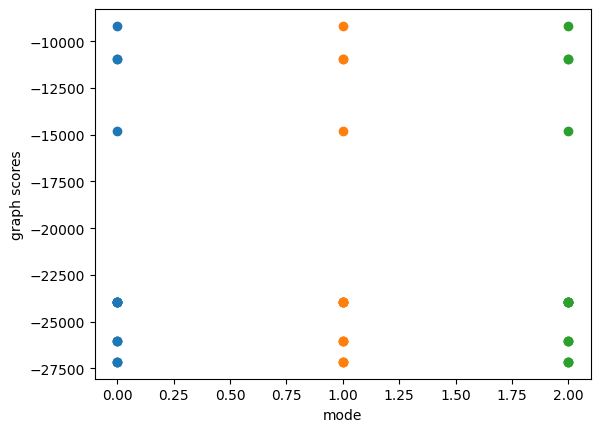

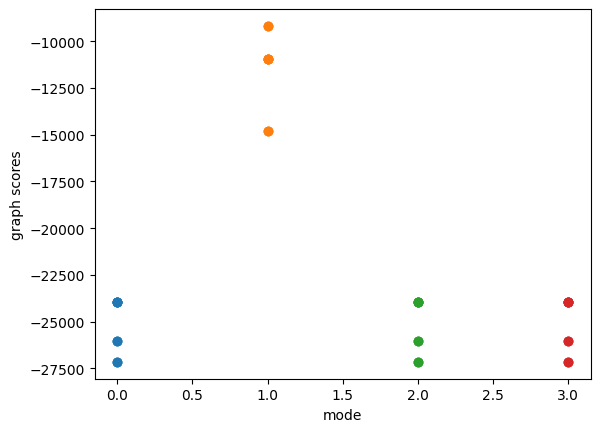

In [18]:
analyse_graphs.graph_score_for_mode(distil_scores, 0)
analyse_graphs.graph_score_for_mode(distil_scores, 1)
analyse_graphs.graph_score_for_mode(distil_scores, 2)


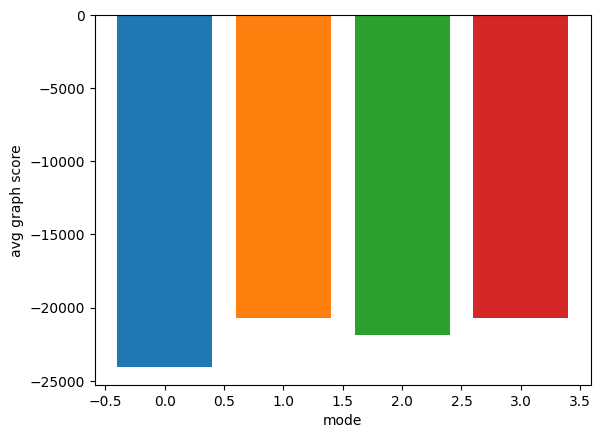

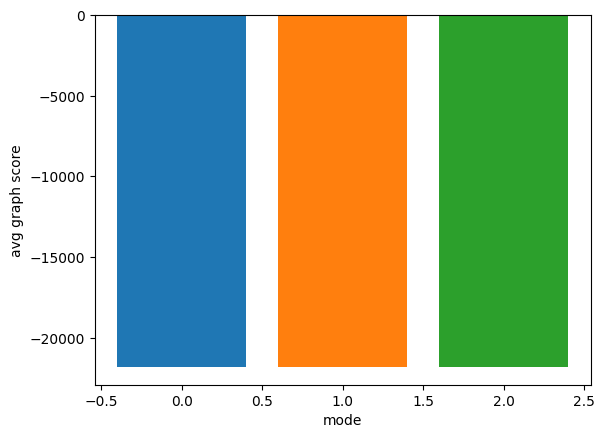

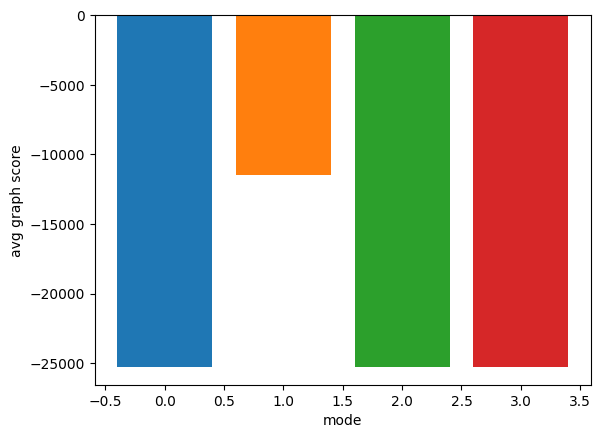

In [19]:
analyse_graphs.avg_graph_score_vs_mode_bar(distil_scores, 0)
analyse_graphs.avg_graph_score_vs_mode_bar(distil_scores, 1)
analyse_graphs.avg_graph_score_vs_mode_bar(distil_scores, 2)

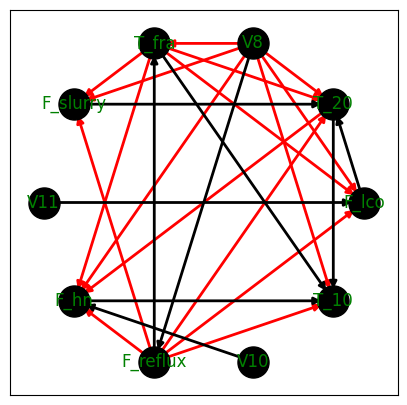

-9172.106893336582


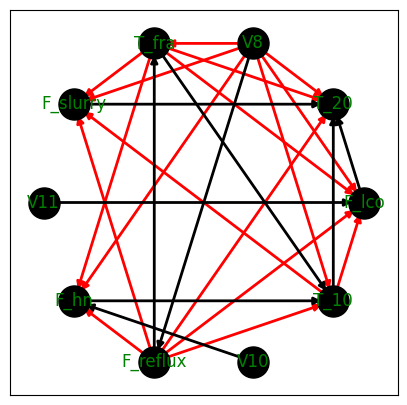

-10925.359994693055


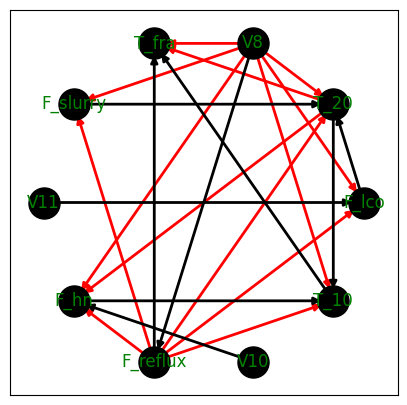

-14801.02718556214


In [20]:
top_three_distil = analyse_graphs.find_top_three_graphs(distil_scores)
for itr in top_three_distil:

    analyse_graphs.visualise_graph(itr[0])
    print(itr[0]['graph score'])

analyse_graphs.write_top_three(top_three_distil, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\fractionator_top_three_scores.xlsx')


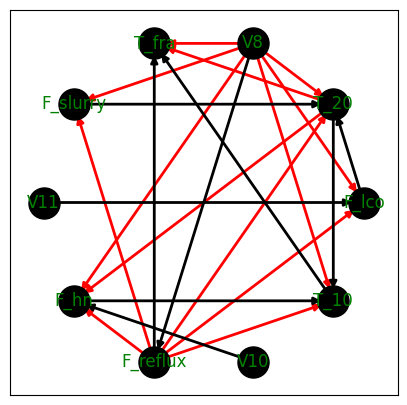

overall metric: 15.909090909090907
pc match: 75.0
pc mismatch: 59.09090909090909


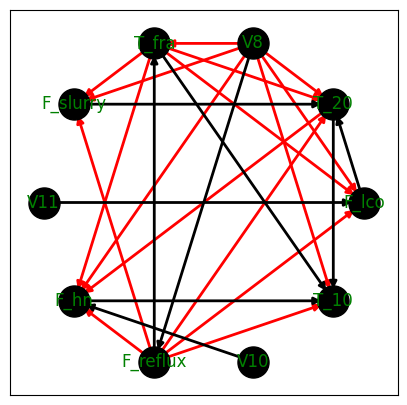

overall metric: 11.0
pc match: 75.0
pc mismatch: 64.0


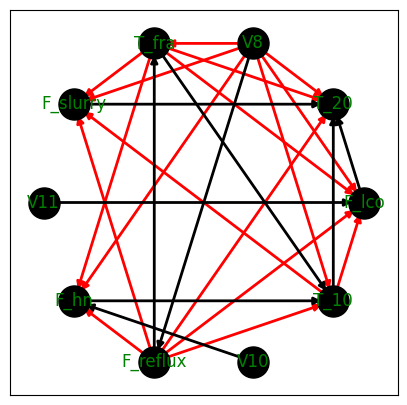

overall metric: 9.615384615384613
pc match: 75.0
pc mismatch: 65.38461538461539


In [21]:
distil_gt_similarity_scores = {}
top_three_closest_distil, distil_gt_similarity_scores['overall metric'], distil_gt_similarity_scores['pc match'], distil_gt_similarity_scores['pc_mismatch'] = analyse_graphs.find_top_three_closest_to_gt(distil_scores, truth_graph)
for itr in top_three_closest_distil:

    analyse_graphs.visualise_graph(distil_scores[itr[0]])
    print(f'overall metric: {distil_gt_similarity_scores['overall metric'][itr[0]]}')
    print(f'pc match: {distil_gt_similarity_scores['pc match'][itr[0]]}')
    print(f'pc mismatch: {distil_gt_similarity_scores['pc_mismatch'][itr[0]]}')


closest_data = []
for itr_place in top_three_closest_distil:

    closest_data.append([distil_scores[itr_graph] for itr_graph in itr_place])
analyse_graphs.write_top_three(closest_data, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\fractionator_top_three_closest.xlsx')


In [22]:
pc_unique  = analyse_graphs.find_pc_unique_graphs(distil_scores)
print(pc_unique)
print(pc_unique*len(distil_scores)/100)


12.5
6.0


## Reactor

In [23]:
from test_react2_sections import test_react2_models

react2 = test_react2_models(data, var_mapping)
react2.model_ctrl()

react2_kn_scores = react2.knowledge_scores
react2_scores = react2.comb_data_store

orig_react2_scores = react2_scores
react2_scores, cyclic_react2 = analyse_graphs.remove_cycle_datapoints(react2_scores)

analyse_graphs.write_data_store(react2_scores, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\reactor.xlsx')


[]


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


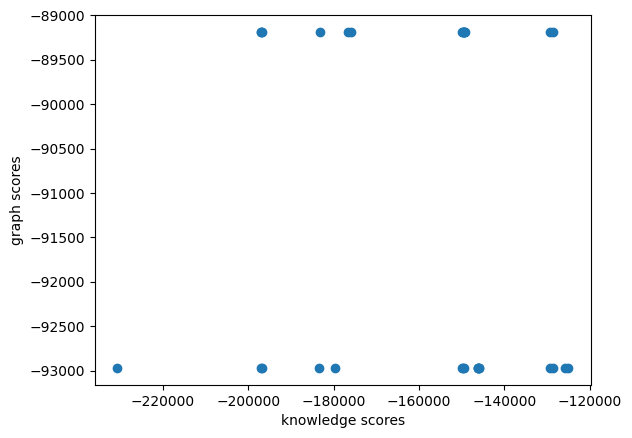

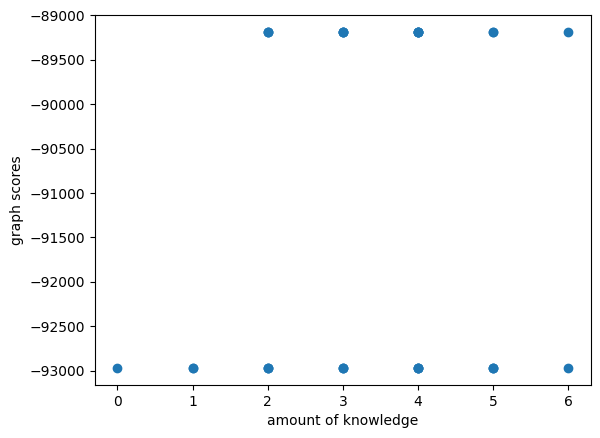

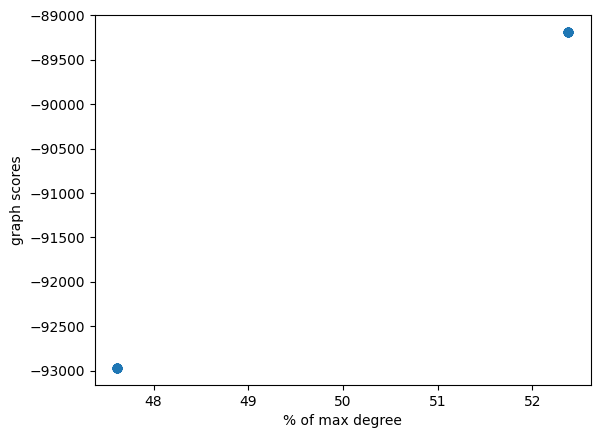

In [24]:
analyse_graphs.kn_score_vs_graph_score(react2_scores)
analyse_graphs.amount_kn_vs_graph_score(react2_scores)
analyse_graphs.pc_max_degree_vs_graph_score(react2_scores)

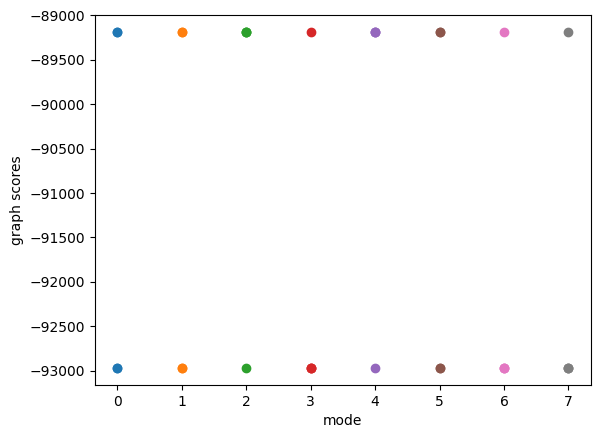

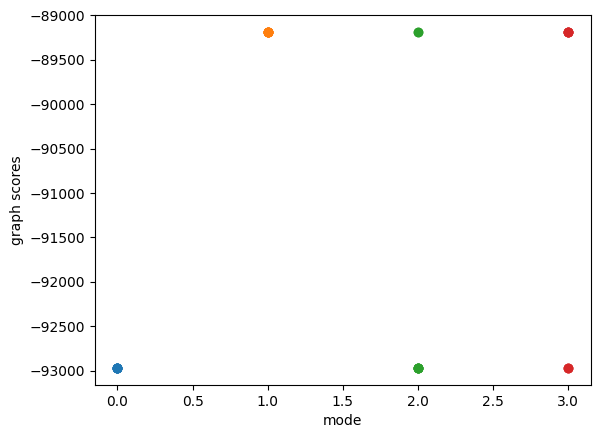

In [25]:
analyse_graphs.graph_score_for_mode(react2_scores, 0)
analyse_graphs.graph_score_for_mode(react2_scores, 1)

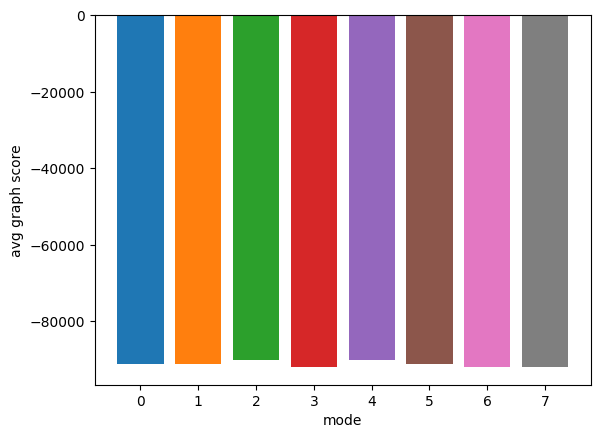

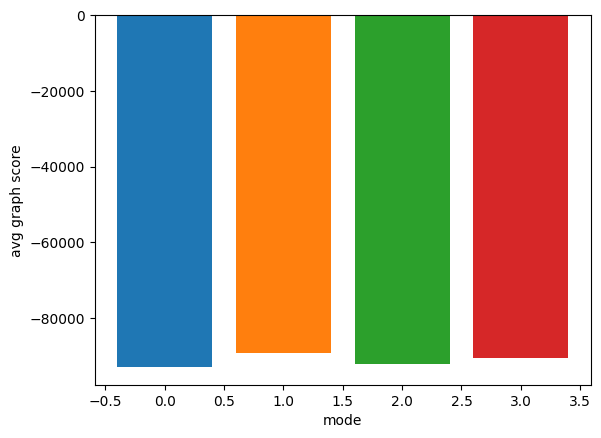

In [26]:
analyse_graphs.avg_graph_score_vs_mode_bar(react2_scores, 0)
analyse_graphs.avg_graph_score_vs_mode_bar(react2_scores, 1)


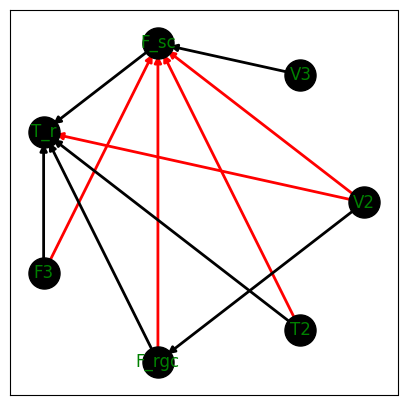

-89185.6692525529


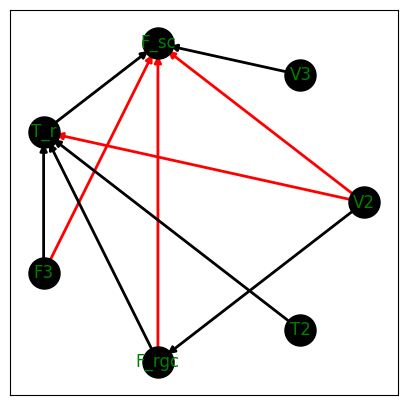

-92969.8888797554


In [27]:
top_three_react2 = analyse_graphs.find_top_three_graphs(react2_scores)
for itr in top_three_react2:

    analyse_graphs.visualise_graph(itr[0])
    print(itr[0]['graph score'])

analyse_graphs.write_top_three(top_three_react2, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\reactor_top_three_score.xlsx')

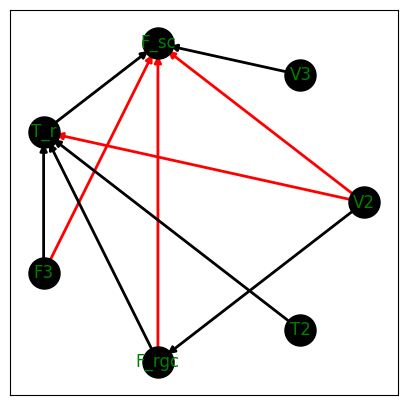

overall metric: 33.33333333333333
pc match: 83.33333333333333
pc mismatch: 50.0


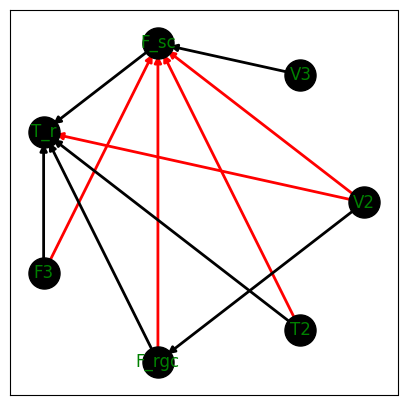

overall metric: 28.787878787878782
pc match: 83.33333333333333
pc mismatch: 54.54545454545455


In [28]:
react2_gt_similarity_scores = {}
top_three_closest_react2, react2_gt_similarity_scores['overall metric'], react2_gt_similarity_scores['pc match'], react2_gt_similarity_scores['pc_mismatch'] = analyse_graphs.find_top_three_closest_to_gt(react2_scores, truth_graph)
for itr in top_three_closest_react2:

    analyse_graphs.visualise_graph(react2_scores[itr[0]])
    print(f'overall metric: {react2_gt_similarity_scores['overall metric'][itr[0]]}')
    print(f'pc match: {react2_gt_similarity_scores['pc match'][itr[0]]}')
    print(f'pc mismatch: {react2_gt_similarity_scores['pc_mismatch'][itr[0]]}')


closest_data = []
for itr_place in top_three_closest_react2:

    closest_data.append([react2_scores[itr_graph] for itr_graph in itr_place])
analyse_graphs.write_top_three(closest_data, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\reactor_top_three_closest.xlsx')


In [29]:
pc_unique  = analyse_graphs.find_pc_unique_graphs(react2_scores)
print(pc_unique)
print(pc_unique*len(react2_scores)/100)

6.25
2.0


## Preheater

In [30]:
from test_furn_sections import test_furn_models

furn = test_furn_models(data, var_mapping)
furn.model_ctrl()

furn_kn_scores = furn.knowledge_scores
furn_scores = furn.comb_data_store

orig_furn_scores = furn_scores
furn_scores, cyclic_furn = analyse_graphs.remove_cycle_datapoints(furn_scores)

analyse_graphs.write_data_store(furn_scores, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\furnace.xlsx')

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


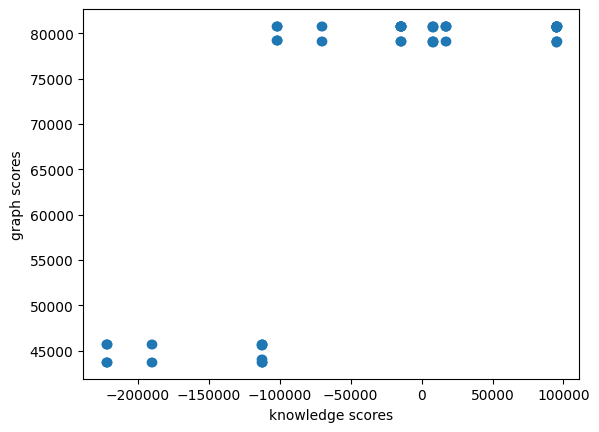

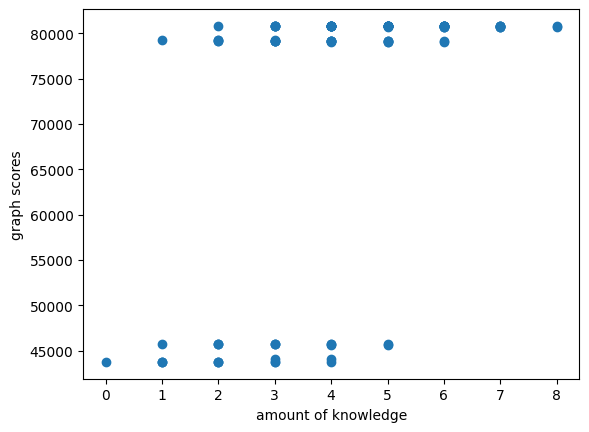

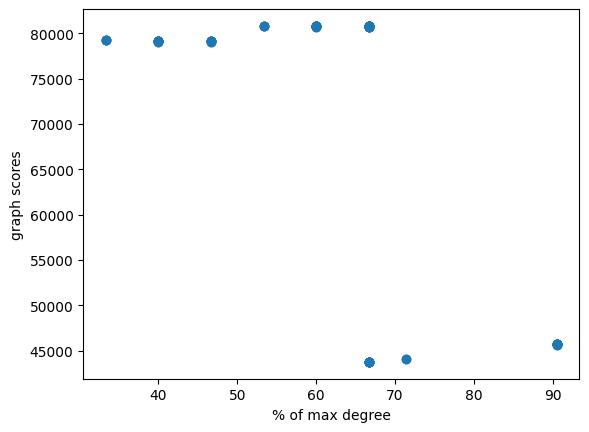

In [31]:
analyse_graphs.kn_score_vs_graph_score(furn_scores)
analyse_graphs.amount_kn_vs_graph_score(furn_scores)
analyse_graphs.pc_max_degree_vs_graph_score(furn_scores)

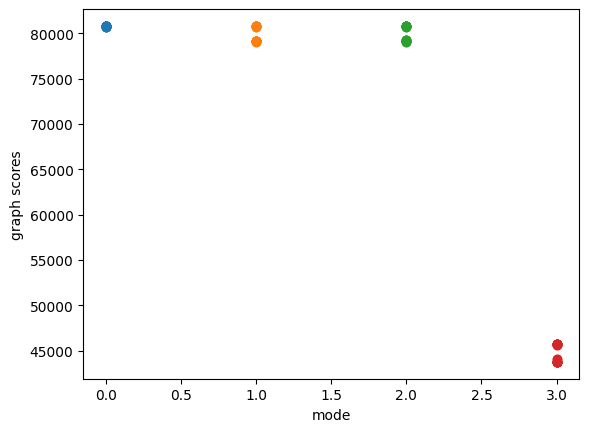

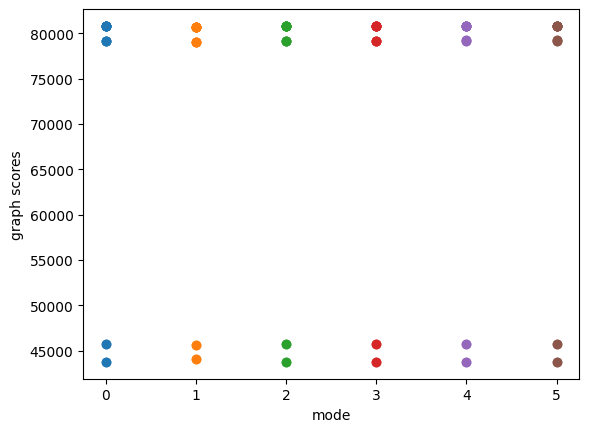

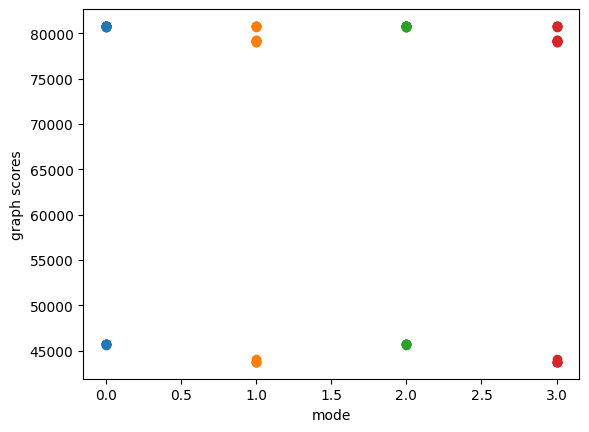

In [32]:
analyse_graphs.graph_score_for_mode(furn_scores, 0)
analyse_graphs.graph_score_for_mode(furn_scores, 1)
analyse_graphs.graph_score_for_mode(furn_scores, 2)

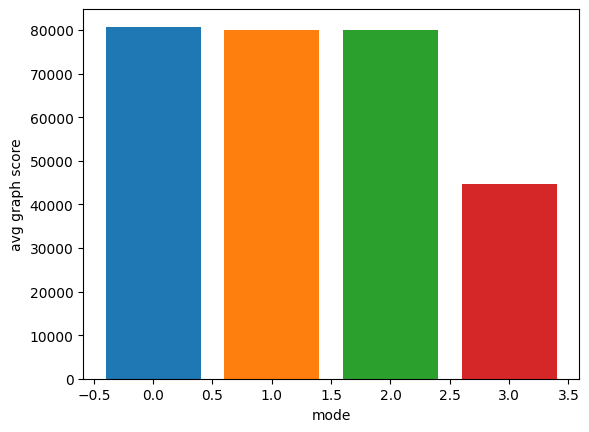

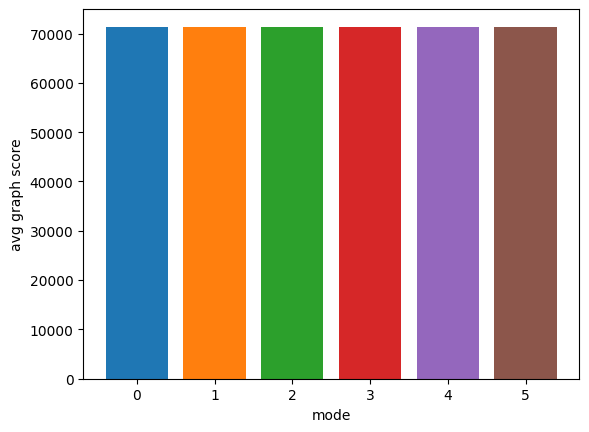

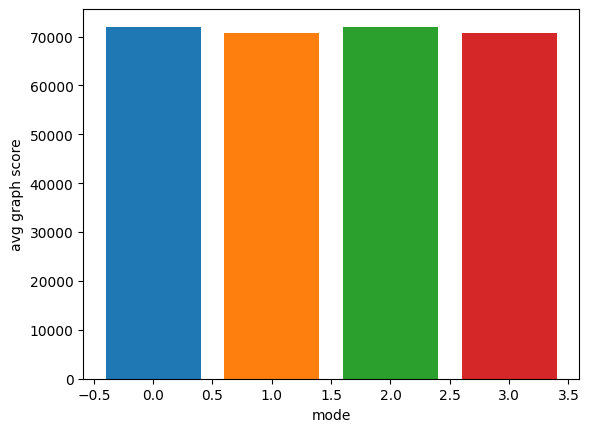

In [33]:
analyse_graphs.avg_graph_score_vs_mode_bar(furn_scores, 0)
analyse_graphs.avg_graph_score_vs_mode_bar(furn_scores, 1)
analyse_graphs.avg_graph_score_vs_mode_bar(furn_scores, 2)

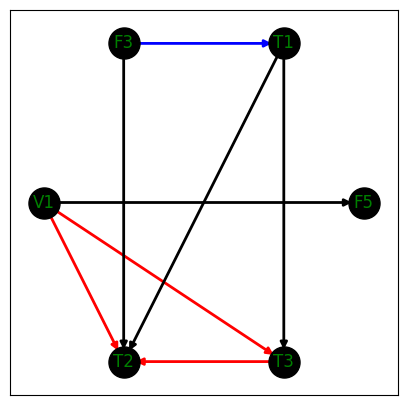

80812.13231980552


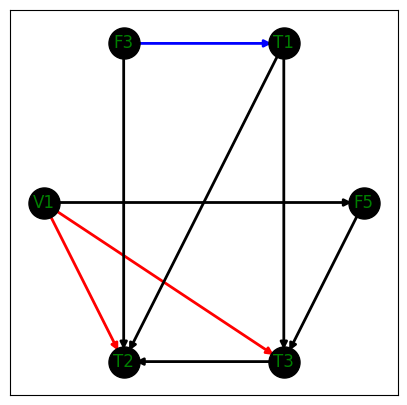

80799.27431263936


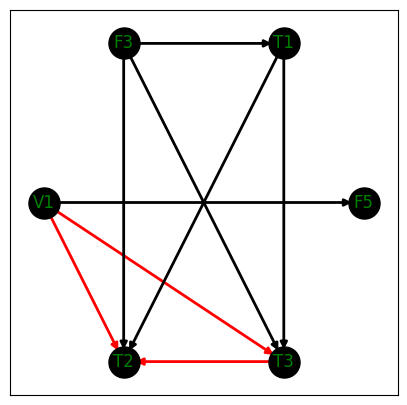

80779.88874838418


In [34]:
top_three_furn = analyse_graphs.find_top_three_graphs(furn_scores)
for itr in top_three_furn:

    analyse_graphs.visualise_graph(itr[0])
    print(itr[0]['graph score'])

analyse_graphs.write_top_three(top_three_furn, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\furnace_top_three_score.xlsx')

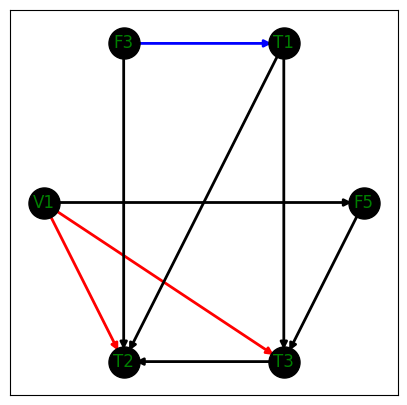

overall metric: 55.55555555555556
pc match: 100.0
pc mismatch: 44.44444444444444


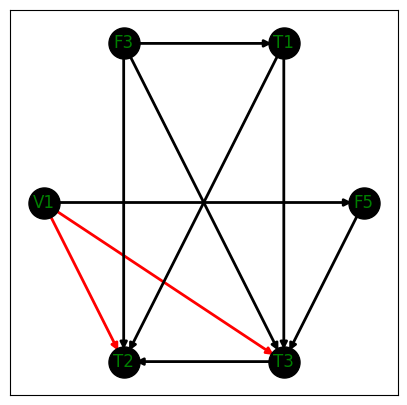

overall metric: 50.0
pc match: 100.0
pc mismatch: 50.0


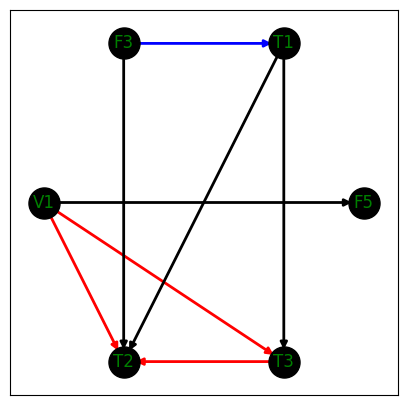

overall metric: 30.0
pc match: 80.0
pc mismatch: 50.0


In [35]:

furn_gt_similarity_scores = {}
top_three_closest_furn, furn_gt_similarity_scores['overall metric'], furn_gt_similarity_scores['pc match'], furn_gt_similarity_scores['pc_mismatch'] = analyse_graphs.find_top_three_closest_to_gt(furn_scores, truth_graph)
for itr in top_three_closest_furn:

    analyse_graphs.visualise_graph(furn_scores[itr[0]])
    print(f'overall metric: {furn_gt_similarity_scores['overall metric'][itr[0]]}')
    print(f'pc match: {furn_gt_similarity_scores['pc match'][itr[0]]}')
    print(f'pc mismatch: {furn_gt_similarity_scores['pc_mismatch'][itr[0]]}')


closest_data = []
for itr_place in top_three_closest_furn:

    closest_data.append([furn_scores[itr_graph] for itr_graph in itr_place])
analyse_graphs.write_top_three(closest_data, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\furnace_top_three_similar.xlsx')


In [36]:
pc_unique  = analyse_graphs.find_pc_unique_graphs(furn_scores)
print(pc_unique)
print(pc_unique*len(furn_scores)/100)


16.666666666666668
16.0


## Wet gas compressor

In [37]:
from test_wgc_sections import test_wgc_models

wgc = test_wgc_models(data, var_mapping)
wgc.model_ctrl()

wgc_kn_scores = wgc.knowledge_scores
wgc_scores = wgc.comb_data_store

orig_wgc_scores = wgc_scores
wgc_scores, cyclic_furn = analyse_graphs.remove_cycle_datapoints(wgc_scores)

analyse_graphs.write_data_store(wgc_scores, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\wgc.xlsx')

[]


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


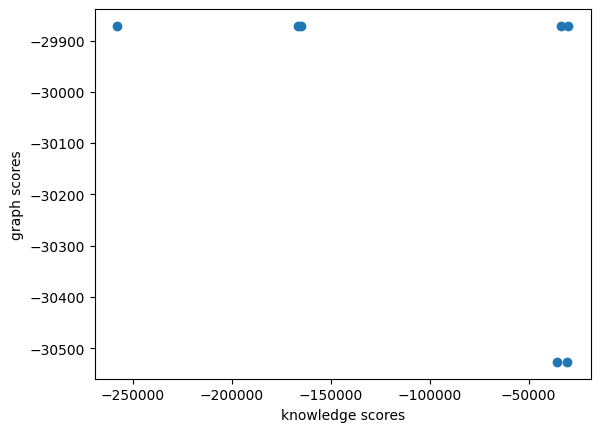

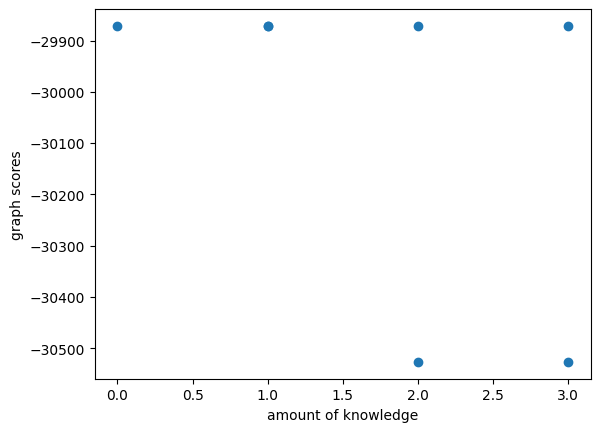

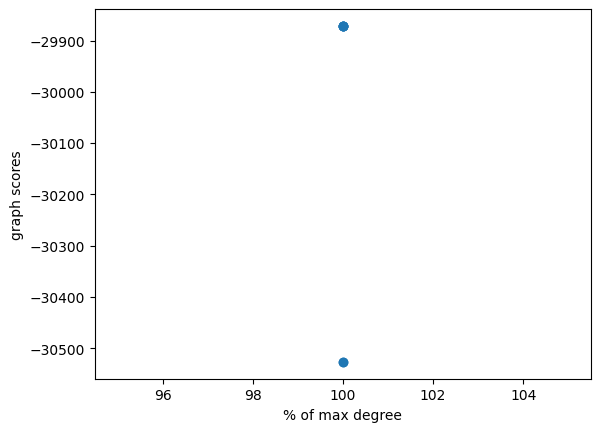

In [38]:
analyse_graphs.kn_score_vs_graph_score(wgc_scores)
analyse_graphs.amount_kn_vs_graph_score(wgc_scores)
analyse_graphs.pc_max_degree_vs_graph_score(wgc_scores)

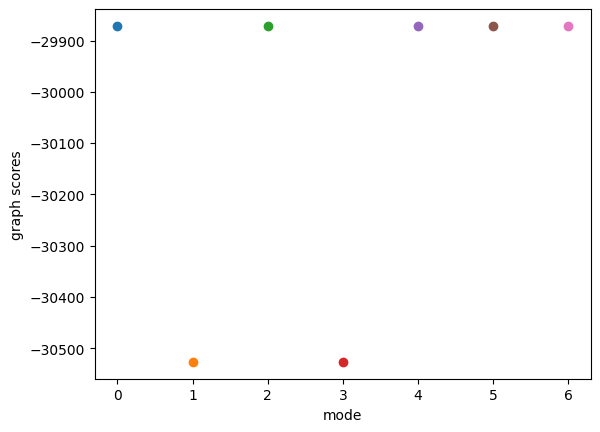

In [39]:
analyse_graphs.graph_score_for_mode(wgc_scores, 0)

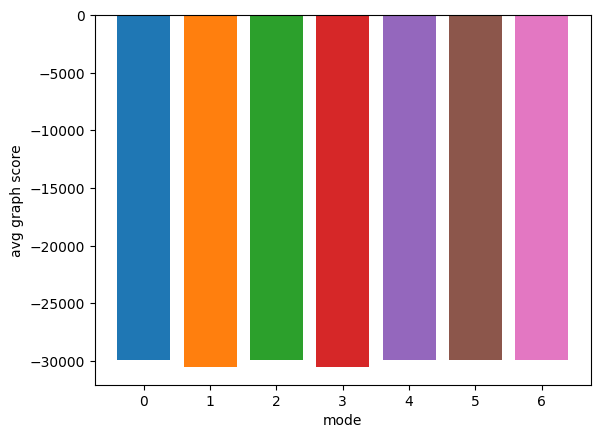

In [40]:
analyse_graphs.avg_graph_score_vs_mode_bar(wgc_scores, 0)

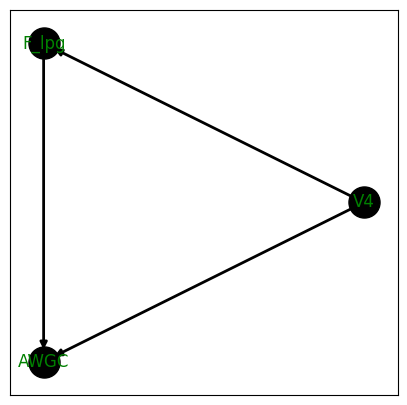

-29871.381015835817


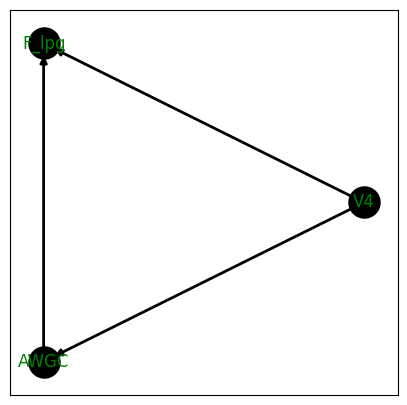

-30526.846720051613


In [41]:
top_three_wgc = analyse_graphs.find_top_three_graphs(wgc_scores)
for itr in top_three_wgc:

    analyse_graphs.visualise_graph(itr[0])
    print(itr[0]['graph score'])

analyse_graphs.write_top_three(top_three_wgc, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\wgc_top_three_score.xlsx')

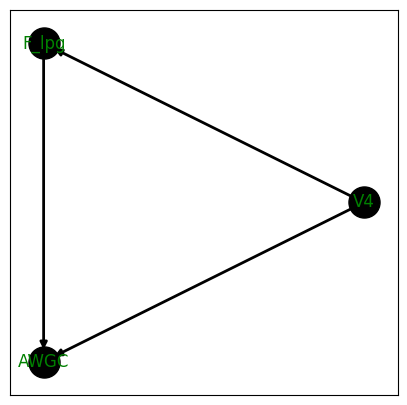

overall metric: 66.66666666666666
pc match: 100.0
pc mismatch: 33.333333333333336


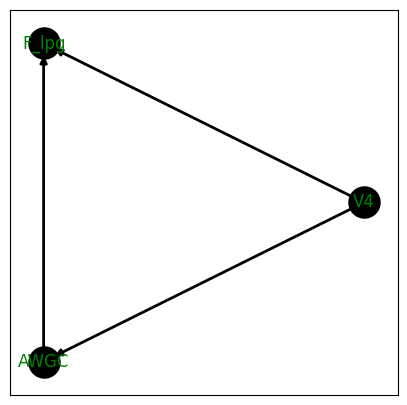

overall metric: -16.66666666666667
pc match: 50.0
pc mismatch: 66.66666666666667


In [42]:

wgc_gt_similarity_scores = {}
top_three_closest_wgc, wgc_gt_similarity_scores['overall metric'], wgc_gt_similarity_scores['pc match'], wgc_gt_similarity_scores['pc_mismatch'] = analyse_graphs.find_top_three_closest_to_gt(wgc_scores, truth_graph)
for itr in top_three_closest_wgc:

    analyse_graphs.visualise_graph(wgc_scores[itr[0]])
    print(f'overall metric: {wgc_gt_similarity_scores['overall metric'][itr[0]]}')
    print(f'pc match: {wgc_gt_similarity_scores['pc match'][itr[0]]}')
    print(f'pc mismatch: {wgc_gt_similarity_scores['pc_mismatch'][itr[0]]}')


closest_data = []
for itr_place in top_three_closest_wgc:

    closest_data.append([wgc_scores[itr_graph] for itr_graph in itr_place])
analyse_graphs.write_top_three(closest_data, r'C:\Users\fcb19bd\Documents\CPE440-Project---Graph-generation-main\Results\wgc_top_three_similar.xlsx')
